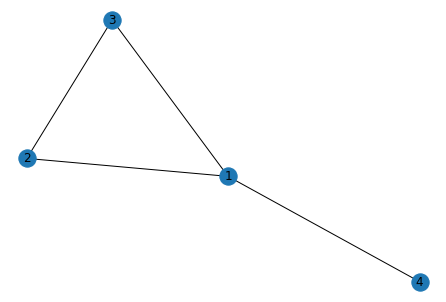

In [41]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
nx.draw(G, with_labels=True)

In [42]:
#path in a network is a sequence of edges connecting two nodes
print(nx.has_path(G, 3, 4))
print(nx.has_path(G,1,2))
print(nx.has_path(G,4,2))

True
True
True


In [5]:
print(list(nx.all_simple_paths(G, 3, 4)))
print(list(nx.all_simple_paths(G,1,2)))
print(list(nx.all_simple_paths(G,4,2)))

[[3, 2, 1, 4], [3, 1, 4]]
[[1, 2], [1, 3, 2]]
[[4, 1, 2], [4, 1, 3, 2]]


In [43]:
print(nx.shortest_path(G, 3, 4))
print(nx.shortest_path(G, 1, 2))
print(nx.shortest_path(G, 4, 2))

[3, 1, 4]
[1, 2]
[4, 1, 2]


In [44]:
#path length is defined here by the number of edges in the path, not the number of nodes
print(nx.shortest_path_length(G, 3, 4))
print(nx.shortest_path_length(G, 1, 2))
print(nx.shortest_path_length(G, 4, 2))

2
1
2


In [45]:
########Connected components:every pair of nodes, we can find a path connecting them
nx.is_connected(G)


True

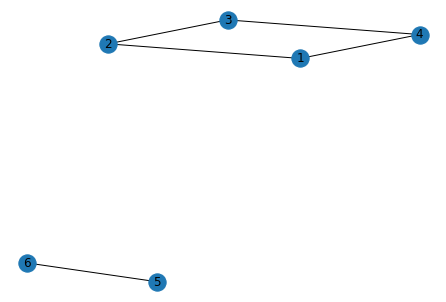

In [46]:
G = nx.Graph()

nx.add_cycle(G,[1,2,3,4])
G.add_edge(5,6)

nx.draw(G, with_labels=True)

In [47]:
nx.is_connected(G)

False

In [48]:
nx.has_path(G, 3, 5)

False

In [49]:
#the error will raised cause there is no path betweeen 2 nodes
nx.shortest_path(G, 3, 5)

NetworkXNoPath: No path between 3 and 5.

In [50]:
nx.number_connected_components(G)

2

In [51]:
#function takes a graph and returns a list of sets of node names
list(nx.connected_components(G))

[{1, 2, 3, 4}, {5, 6}]

In [20]:
components = list(nx.connected_components(G))
print(len(components[0]))
print(len(components[1]))

4
2


In [52]:
#max function in order to obtain the largest connected component. 
#By default, Python's max function sorts things in alphabetical order, which is not helpful here. 
#We want the maximum connected component when sorted in order of their sizes, so we pass len as a key function
max(nx.connected_components(G), key=len)

{1, 2, 3, 4}

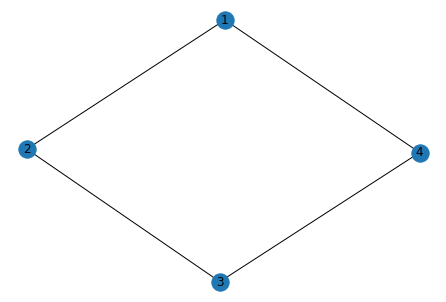

In [53]:
#subgraph consisting of the largest connected component
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)
nx.draw(core, with_labels=True)

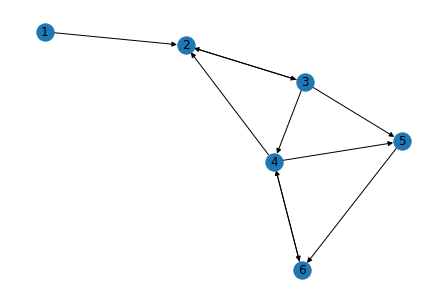

In [55]:
###########Directed paths & components
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

In [56]:
#paths must follow edge direction in directed graphs
nx.has_path(D, 1, 4)

True

In [57]:
nx.has_path(D, 4, 1)

False

In [58]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [59]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

In [60]:
#Strongly connected means that there exists a directed path between every pair of nodes
nx.is_strongly_connected(D)

False

In [61]:
#Weakly connected means that there exist a path between every pair of nodes, regardless of direction
nx.is_weakly_connected(D)

True

In [62]:
#for undirected graphs will raise an error
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

In [32]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [33]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

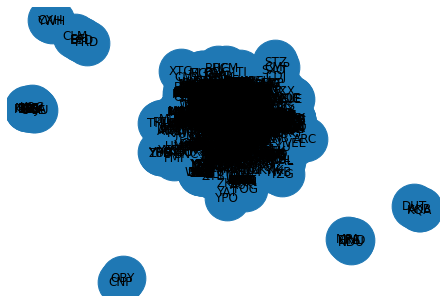

In [34]:
#dataset uploaded into jupyter environment
G=nx.read_graphml('openflights_world.graphml')
nx.draw(G, with_labels=True,node_size=2000)

In [35]:
G.nodes['FAI']

{'IATA': 'FAI',
 'name': 'Fairbanks International Airport',
 'latitude': 64.81510162,
 'longitude': -147.85600280000003}

In [36]:
G.nodes['FAI']['name']

'Fairbanks International Airport'

In [37]:
#EXERCISE 1
path=nx.shortest_path(G, 'IND','FAI' )
if len(path)>2:
    print('there is no direct path')
else:
    print('there is direct path')

there is no direct path


In [38]:
#EXERCISE 2
path=nx.shortest_path(G, 'IND','FAI' )
print("the fewest number of flights to arrive is : ",len(path)-1)

the fewest number of flights to arrive is :  3


In [39]:
nx.is_connected(G)

False

In [40]:
#EXERCISE 3
if nx.is_connected(G):
    print("yes it's possible")
else:
    print("it's not possible")

it's not possible
